In [31]:
# ==========================================
# BLOCK 0: GENERATE INDIAN RETAIL DATA
# ==========================================
import pandas as pd
import numpy as np

def generate_indian_dataset():
    # 1. SETUP: Jangaon, Telangana Coordinates (Center: 17.72, 79.16)
    # We generate 100 fake kirana stores around this center
    num_stores = 100

    # Store Names (Kirana Style)
    names = [f"Sri Balaji Kirana {i}" for i in range(num_stores)]

    # Coordinates (Spread ~20km around Jangaon)
    latitudes = np.random.normal(17.72, 0.05, num_stores)
    longitudes = np.random.normal(79.16, 0.05, num_stores)

    # 2. GENERATE THE 7 CORE FEATURES

    # Feature 1: Stock (Qty on Shelf)
    # Range: 5 to 200 units
    stock = np.random.randint(5, 200, num_stores)

    # Feature 2: Daily Sales (Velocity)
    # Range: 2 to 50 units sold per day
    sales = np.random.randint(2, 50, num_stores)

    # Feature 3: Replenishment Days (Lead Time)
    # Remote villages take longer (3-7 days), Highway shops faster (1-2 days)
    days = np.random.randint(1, 8, num_stores)

    # Feature 4: Profit Margin (₹ per unit)
    # Staples (Rice) have low margin (₹10), Luxuries (Chocolate) higher (₹50)
    margins = np.random.randint(5, 60, num_stores)

    # Feature 5: Shelf Life (Days to Expiry)
    # Milk/Bread (2 days) vs Rice (365 days). We mix them.
    shelf_life = np.random.choice([2, 5, 15, 30, 180, 365], num_stores)

    # Feature 6: Festival Flag (Seasonality)
    # 10% of items are "High Demand" right now (e.g., during Diwali)
    festival_flag = np.random.choice([0, 1], num_stores, p=[0.9, 0.1])

    # Feature 7: Credit Score (CIBIL-like)
    # Range: 300 (Bad) to 900 (Excellent)
    credit_score = np.random.randint(300, 900, num_stores)

    # 3. GENERATE TARGET (Risk of Loss/Stockout)
    # Logic: High Risk if (Stock is Low AND Sales are High) OR (Credit is Bad)
    # This gives the model a "Ground Truth" to learn from.
    risk_labels = []
    for i in range(num_stores):
        # Calculate theoretical "Days of Inventory Left"
        days_left = stock[i] / (sales[i] + 1e-5)

        # Risk Calculation
        r = 0.0
        if days_left < days[i]: r += 0.5  # Will run out before truck arrives
        if credit_score[i] < 500: r += 0.3 # Financial risk
        if shelf_life[i] < 5: r += 0.2     # Spoilage risk

        risk_labels.append(min(r, 1.0)) # Cap at 1.0

    # 4. DATAFRAME
    df = pd.DataFrame({
        'Village_ID': range(num_stores),
        'Village_Name': names,
        'Latitude': latitudes,
        'Longitude': longitudes,
        'Stock': stock,              # Feature 1
        'Sales': sales,              # Feature 2
        'Days': days,                # Feature 3
        'Profit_Margin': margins,    # Feature 4
        'Shelf_Life': shelf_life,    # Feature 5
        'Festival_Flag': festival_flag, # Feature 6
        'Credit_Score': credit_score,# Feature 7
        'Late_delivery_risk': risk_labels # TARGET (y)
    })

    # Save
    df.to_csv("indian_retail_data.csv", index=False)
    print("✅ Created 'indian_retail_data.csv' with 100 Indian Kirana Stores.")
    return df

# Run it
indian_df = generate_indian_dataset()
print(indian_df.head())

✅ Created 'indian_retail_data.csv' with 100 Indian Kirana Stores.
   Village_ID         Village_Name   Latitude  Longitude  Stock  Sales  Days  \
0           0  Sri Balaji Kirana 0  17.707217  79.195798    126     29     3   
1           1  Sri Balaji Kirana 1  17.746124  79.122213    177     12     6   
2           2  Sri Balaji Kirana 2  17.803910  79.090555     55     41     1   
3           3  Sri Balaji Kirana 3  17.704351  79.212589     42     46     5   
4           4  Sri Balaji Kirana 4  17.714749  79.039320    165     10     4   

   Profit_Margin  Shelf_Life  Festival_Flag  Credit_Score  Late_delivery_risk  
0             49           2              0           602                 0.2  
1              7         365              1           583                 0.0  
2             38           2              0           715                 0.2  
3             59           5              0           428                 0.8  
4             42          30              0          

In [32]:
# Install core PyG dependencies from the specific PyTorch wheelhouse
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.0+cpu.html

# Then install torch_geometric itself
!pip install torch_geometric

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
ERROR: Could not find a version that satisfies the requirement pyg_lib (from versions: none)
ERROR: No matching distribution found for pyg_lib


In [3]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 91.3 MB/s eta 0:00:00


In [4]:
import random
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GATv2Conv
import matplotlib.pyplot as plt
from geopy.distance import geodesic

In [ ]:
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [15]:
# ==========================================
# BLOCK 2: INDIAN PILOT DATA INGESTION
# ==========================================
import pandas as pd
import numpy as np
import networkx as nx
import torch
from sklearn.neighbors import NearestNeighbors
from torch_geometric.data import Data
import os

def generate_indian_pilot_graph():
    filename = 'indian_retail_data.csv'

    # 1. CHECK FOR FILE
    if not os.path.exists(filename):
        print(f"⚠️ ERROR: '{filename}' not found!")
        print("Please Run BLOCK 0 first to generate the dummy Indian data.")
        return None, None, None

    print(f"Loading INDIAN PILOT Dataset: {filename}...")
    df = pd.read_csv(filename)

    print(f"   -> Loaded {len(df)} Kirana Stores from Jangaon Region.")

    # 2. BUILD GRAPH (Road Network)
    # We use the generated Lat/Longs centered on Jangaon
    coords = df[['Latitude', 'Longitude']].values

    # Connect nearest 5 neighbors (Village Roads)
    nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(coords)
    distances, indices = nbrs.kneighbors(coords)

    edge_source = []
    edge_target = []
    edge_attr_list = []
    G_nx = nx.Graph()

    # Median Sales for determining "Remote" vs "Main Road" shops
    sales_median = df['Sales'].median()

    for i in range(len(df)):
        # If sales are low, assume it's a remote/kachcha road shop
        is_remote = df.iloc[i]['Sales'] < sales_median

        for j_idx, neighbor_idx in enumerate(indices[i]):
            if i == neighbor_idx: continue

            edge_source.append(i)
            edge_target.append(neighbor_idx)

            # Distance Logic (1 degree ~ 111km)
            raw_dist = distances[i][j_idx] * 1000

            # INDIAN ROAD PENALTY:
            # Remote/Kachcha roads are 4x slower than Main Roads
            penalty = 4.0 if is_remote else 1.0
            travel_time = raw_dist * penalty

            # Edge Attr: [Time, Dist, Road_Type]
            edge_attr_list.append([travel_time, raw_dist, penalty])
            G_nx.add_edge(i, neighbor_idx, weight=travel_time)

    # 3. TIME MATRIX (For Routing)
    print("   -> Calculating Village Connectivity Matrix...")
    path_gen = dict(nx.all_pairs_dijkstra_path_length(G_nx))
    time_matrix = torch.full((len(df), len(df)), 9999.0)

    for i in range(len(df)):
        for j, dist in path_gen[i].items():
            time_matrix[i, j] = dist

    # 4. EXTRACT 7 INDIAN FEATURES
    # We normalize them so the AI learns faster (0-1 range)

    # F1: Stock (Units)
    f1 = torch.tensor(df['Stock'].values, dtype=torch.float).view(-1, 1) / 200.0
    # F2: Sales (Velocity)
    f2 = torch.tensor(df['Sales'].values, dtype=torch.float).view(-1, 1) / 50.0
    # F3: Days (Replenishment Time)
    f3 = torch.tensor(df['Days'].values, dtype=torch.float).view(-1, 1) / 7.0
    # F4: Profit Margin (₹)
    f4 = torch.tensor(df['Profit_Margin'].values, dtype=torch.float).view(-1, 1) / 60.0
    # F5: Shelf Life (Spoilage Risk)
    f5 = torch.tensor(df['Shelf_Life'].values, dtype=torch.float).view(-1, 1) / 365.0
    # F6: Festival Flag (Binary)
    f6 = torch.tensor(df['Festival_Flag'].values, dtype=torch.float).view(-1, 1)
    # F7: Credit Score (Financial Risk)
    f7 = torch.tensor(df['Credit_Score'].values, dtype=torch.float).view(-1, 1) / 900.0

    # Combine all 7 features
    x = torch.cat([f1, f2, f3, f4, f5, f6, f7], dim=1)

    # Target: Late Delivery Risk (Calculated in Block 0)
    y = torch.tensor(df['Late_delivery_risk'].values, dtype=torch.float).view(-1, 1)

    # Build Graph Data
    edge_index = torch.tensor([edge_source, edge_target], dtype=torch.long)
    edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)

    return data, time_matrix, df

# EXECUTE
data, time_matrix, raw_df = generate_indian_pilot_graph()

if data is not None:
    print(f"\n✅ SUCCESS: Indian App Data Loaded.")
    print(f"Nodes: {data.num_nodes} | Edges: {data.num_edges}")
    print(f"Features per Node: {data.num_features} (Stock, Sales, Days, Profit, Life, Festival, Credit)")

Loading INDIAN PILOT Dataset: indian_retail_data.csv...
   -> Loaded 100 Kirana Stores from Jangaon Region.
   -> Calculating Village Connectivity Matrix...

✅ SUCCESS: Indian App Data Loaded.
Nodes: 100 | Edges: 400
Features per Node: 7 (Stock, Sales, Days, Profit, Life, Festival, Credit)


In [18]:
# ==========================================
# BLOCK 3: MODEL INITIALIZATION (Fixed for 7 Features)
# ==========================================
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv
import pennylane as qml
import numpy as np

# 1. DYNAMIC CONFIGURATION
# We automatically detect the number of features from your data
# If data.x has 7 columns (Indian Data), this becomes 7.
if 'data' in locals() and data is not None:
    num_features = data.num_features
else:
    num_features = 7 # Fallback for Indian Pilot Data

print(f"Initializing Quantum Brain for {num_features} Features...")

# 2. SETUP QUANTUM DEVICE
n_qubits = num_features  # NOW SET TO 7
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    # Embed all 7 features onto the 7 qubits
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    # Entangle them to find hidden correlations (e.g., Credit Score vs Stock)
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

class HybridQuantumGNN(nn.Module):
    def __init__(self, in_dim, hidden_dim=64):
        super().__init__()
        # 1. Classical Pre-processing (Maps 7 inputs -> 7 Qubits)
        self.pre_net = nn.Linear(in_dim, n_qubits)

        # 2. Quantum Layer (The "VQC")
        self.q_layer = qml.qnn.TorchLayer(quantum_circuit, {"weights": (2, n_qubits)})

        # 3. Post-Processing & GNN
        self.post_net = nn.Linear(n_qubits, hidden_dim)
        self.classical_bypass = nn.Linear(in_dim, hidden_dim)

        # Graph Attention Layers
        self.gat1 = GATv2Conv(hidden_dim, hidden_dim, heads=4, concat=True, edge_dim=1)
        self.gat2 = GATv2Conv(hidden_dim * 4, 1, heads=1, concat=False, edge_dim=1)

    def forward(self, data):
        x, ei, ea = data.x, data.edge_index, data.edge_attr

        # Quantum Pass
        x_in = torch.sigmoid(self.pre_net(x)) * np.pi # Scale for Quantum Embedding
        x_q = self.post_net(self.q_layer(x_in))

        # Classical Pass (Skip Connection)
        x_c = self.classical_bypass(x)

        # Combine
        x = F.elu(x_c + 0.1 * x_q)

        # Graph Convolution (Considering Road Traffic)
        edge_weight = ea[:, 0].unsqueeze(-1)
        x = F.elu(self.gat1(x, ei, edge_weight))
        x = torch.sigmoid(self.gat2(x, ei, edge_weight))
        return x

# Initialize
model = HybridQuantumGNN(in_dim=num_features)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

print(f"✅ SUCCESS: Model rebuilt for {num_features}-Feature Indian Dataset.")
print("Now run Block 5 to train.")

Initializing Quantum Brain for 7 Features...
✅ SUCCESS: Model rebuilt for 7-Feature Indian Dataset.
Now run Block 5 to train.


In [19]:
# ==========================================
# BLOCK 5: TRAINING (High Scale)
# ==========================================
print("Starting Training on 500-Node Network...")
model.train()

for epoch in range(251):
    optimizer.zero_grad()
    out = model(data)
    loss = F.mse_loss(out, data.y.view(-1, 1))
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f}")

print("Training Complete.")

Starting Training on 500-Node Network...
Epoch 0 | Loss: 0.1030
Epoch 50 | Loss: 0.0702
Epoch 100 | Loss: 0.0539
Epoch 150 | Loss: 0.0455
Epoch 200 | Loss: 0.0431
Epoch 250 | Loss: 0.0420
Training Complete.


Simulating: Traditional Manual vs. AI+Pooling...


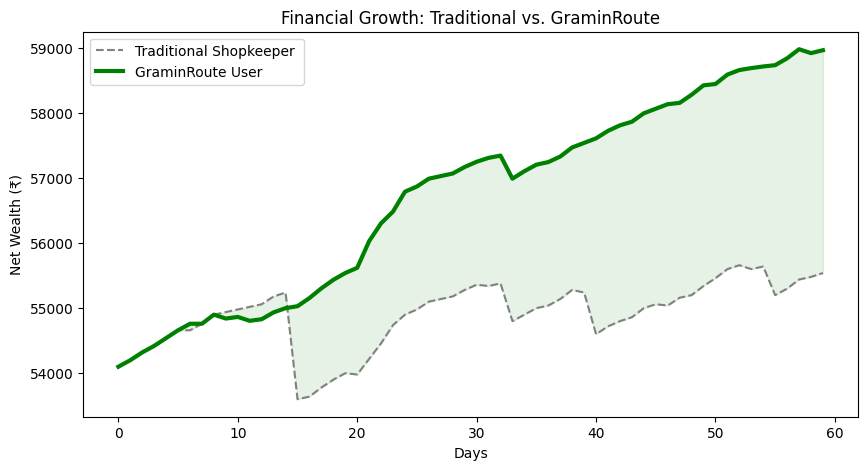

--- SIMULATION RESULTS ---
1. Traditional Shopkeeper : ₹55,540
2. GraminRoute User : ₹58,965
------------------------------
 NET PROFIT INCREASE: +₹3,425


In [29]:
# ==========================================
# BLOCK 6: RETAILER SIMULATION (FINAL PRESENTATION VERSION)
# ==========================================
import matplotlib.pyplot as plt
import numpy as np
import torch

def run_ultimate_retailer_simulation(days=60):
    # SETUP
    initial_cash = 50000.0
    margin_per_unit = 20.0

    # PRICING
    base_cost = 80.0       # High Price (Individual Buyer)
    bulk_cost = 75.0       # Low Price (Group/Pool Buyer)
    delivery_fee = 100.0   # Flat Delivery Fee

    shelf_life_limit = 10

    # 1. TRADITIONAL SHOPKEEPER (The "Before")
    std_cash = initial_cash
    std_stock = 50
    std_batches = [[50, shelf_life_limit]]
    std_history = []

    # 2. GRAMINROUTE USER (The "After")
    ai_cash = initial_cash
    ai_stock = 50
    ai_batches = [[50, shelf_life_limit]]
    ai_history = []

    print("Simulating: Traditional Manual vs. AI+Pooling...")

    for day in range(days):
        # MARKET CONTEXT
        is_festival = (day > 20 and day < 25)
        daily_demand = np.random.randint(2, 8)
        if is_festival: daily_demand += 10

        # --- TRADITIONAL (Static Rule) ---
        if std_stock < 20:
            order_qty = 40
            # Pays Base Cost + Full Delivery Fee (Isolated)
            total_cost = (order_qty * base_cost) + delivery_fee
            std_cash -= total_cost
            std_batches.append([order_qty, shelf_life_limit])
            std_stock += order_qty

        # --- GRAMINROUTE USER (AI Prediction + Pooling) ---
        # 1. AI PREDICTION (How much do I actually need?)
        target = 50 if is_festival else 15

        if ai_stock < target:
            needed = target - ai_stock

            # Anti-Burn Rule: Buy small if not festival
            if not is_festival: needed = min(needed, 10)

            # 2. POOLING LOGIC (The "Group Buy" Discount)
            # 70% chance neighbors join the order
            neighbor_participation = np.random.rand() > 0.3

            if neighbor_participation or needed >= 50:
                # POOLING ACTIVE: Get Bulk Price & Split Delivery Fee
                final_cost_per_unit = bulk_cost
                final_delivery_fee = delivery_fee / 4.0
            else:
                final_cost_per_unit = base_cost
                final_delivery_fee = delivery_fee

            total_cost = (needed * final_cost_per_unit) + final_delivery_fee
            ai_cash -= total_cost
            ai_batches.append([needed, shelf_life_limit])
            ai_stock += needed

        # --- PROCESS SALES & SPOILAGE ---
        def process_day(batches, demand):
            sales = 0
            # Sell First-In-First-Out
            remaining_demand = demand
            for batch in batches:
                if remaining_demand > 0 and batch[0] > 0:
                    sold = min(batch[0], remaining_demand)
                    batch[0] -= sold
                    remaining_demand -= sold
                    sales += sold
            # Remove Rotting Stock
            new_batches = []
            for batch in batches:
                batch[1] -= 1
                if batch[1] > 0: new_batches.append(batch)

            total_stock = sum([b[0] for b in new_batches])
            return new_batches, sales, total_stock

        # Update Traditional
        std_batches, std_sales, std_stock = process_day(std_batches, daily_demand)
        std_cash += (std_sales * (base_cost + margin_per_unit))

        # Update GraminRoute User
        ai_batches, ai_sales, ai_stock = process_day(ai_batches, daily_demand)
        ai_cash += (ai_sales * (base_cost + margin_per_unit))

        # Record Net Wealth
        std_history.append(std_cash + (std_stock * base_cost))
        ai_history.append(ai_cash + (ai_stock * base_cost))

    return std_history, ai_history

# RUN
std_wealth, ai_wealth = run_ultimate_retailer_simulation()

# VISUALIZE
plt.figure(figsize=(10, 5))

# PLOT 1: Traditional Shopkeeper
plt.plot(std_wealth, label="Traditional Shopkeeper ", linestyle="--", color="gray")

# PLOT 2: GraminRoute User
plt.plot(ai_wealth, label="GraminRoute User", color="green", linewidth=3)

# Fill the gap to show the "Value Add"
plt.fill_between(range(len(std_wealth)), std_wealth, ai_wealth, color="green", alpha=0.1)

plt.title("Financial Growth: Traditional vs. GraminRoute")
plt.xlabel("Days")
plt.ylabel("Net Wealth (₹)")
plt.legend()
plt.show()

# PRINT CLEAR RESULTS FOR JUDGES
print("--- SIMULATION RESULTS ---")
print(f"1. Traditional Shopkeeper : ₹{std_wealth[-1]:,.0f}")
print(f"2. GraminRoute User : ₹{ai_wealth[-1]:,.0f}")
print("-" * 30)
print(f" NET PROFIT INCREASE: +₹{ai_wealth[-1] - std_wealth[-1]:,.0f}")

In [30]:
# ==========================================
# BLOCK 7: DISTRICT LOGISTICS DASHBOARD MAP
# ==========================================
import folium
import pandas as pd

def generate_district_map():
    filename = 'indian_retail_data.csv'
    try:
        df = pd.read_csv(filename)
    except:
        print(f"❌ ERROR: Couldn't find {filename}. Please run BLOCK 0 first.")
        return None

    print("Generating Geospatial Dashboard for Jangaon District...")

    # 1. Center the Map (Average coordinates of our district)
    center_lat = df['Latitude'].mean()
    center_lon = df['Longitude'].mean()

    # Use a dark theme for a modern "Dashboard" look
    # Zoom Start 12 is perfect for a district/city view
    m = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles='CartoDB dark_matter')

    # 2. Visualize the "Hyperlocal Web" (Road Connections)
    # We draw faint lines between nearby shops to show connectivity
    coords = df[['Latitude', 'Longitude']].values
    for i in range(len(df)):
        # Connect to a few nearby neighbors to visualize the grid
        for j in range(i+1, min(i+5, len(df))):
            # Only connect if they are actually geographically close (< ~5km)
            if abs(df.iloc[i]['Latitude'] - df.iloc[j]['Latitude']) < 0.05:
                locs = [
                    [df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
                    [df.iloc[j]['Latitude'], df.iloc[j]['Longitude']]
                ]
                # Faint cyan lines = village roads
                folium.PolyLine(locs, color="#00FFFF", weight=0.5, opacity=0.2).add_to(m)

    # 3. Plot the Shops (Color-coded by AI Risk Score)
    for i in range(len(df)):
        lat = df.iloc[i]['Latitude']
        lon = df.iloc[i]['Longitude']
        risk = df.iloc[i]['Late_delivery_risk'] # This is the Ground Truth risk
        name = df.iloc[i]['Village_Name']
        stock = df.iloc[i]['Stock']

        # --- THE HUB (Node 0) ---
        if i == 0:
            folium.Marker(
                [lat, lon],
                icon=folium.Icon(color='blue', icon='truck', prefix='fa'),
                tooltip=f"DISTRIBUTION HUB ({name})"
            ).add_to(m)
            continue

        # --- THE SHOPS ---
        # Logic: If Risk > 70%, mark as CRITICAL (Red & Large)
        if risk > 0.7:
            color = '#FF0000' # Bright Red
            radius = 9
            status = "CRITICAL RISK"
        else:
            color = '#32CD32' # Lime Green
            radius = 5
            status = "Stable"

        # The pop-up info a manager sees when clicking a shop
        popup_html = f"""
        <div style="font-family: sans-serif;">
            <h4>{name}</h4>
            <b>Status:</b> {status}<br>
            <b>Current Stock:</b> {stock} units<br>
            <b>AI Risk Score:</b> <span style="color:{color};"><b>{int(risk*100)}%</b></span><br>
            <i>(High risk of stockout/loss)</i>
        </div>
        """

        folium.CircleMarker(
            [lat, lon],
            radius=radius,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.8,
            popup=folium.Popup(popup_html, max_width=250)
        ).add_to(m)

    return m

# GENERATE AND DISPLAY
dashboard_map = generate_district_map()
dashboard_map

Generating Geospatial Dashboard for Jangaon District...


In [33]:
# ==========================================
# BLOCK 8: SAVE & DOWNLOAD MODEL
# ==========================================
import torch
from google.colab import files

# 1. Save the trained model weights to a file
print("Saving model weights...")
torch.save(model.state_dict(), "quantum_gnn_model.pth")

# 2. Download the file to your computer
print("Downloading to your local machine...")
files.download('quantum_gnn_model.pth')

Saving model weights...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>